<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Разделим данные на признаки.

In [6]:
X, y = df.drop('Страховые выплаты', axis=1), df['Страховые выплаты']

In [10]:
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


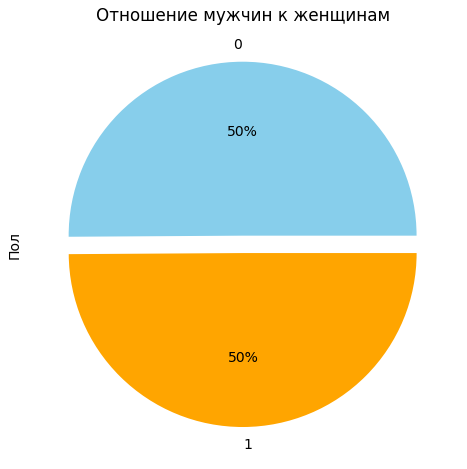

In [8]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 8))
df['Пол'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    colors=['skyblue', 'orange'],
    explode=(0.05, 0.05))
plt.title('Отношение мужчин к женщинам')
plt.show()

Проверим распределения данных.

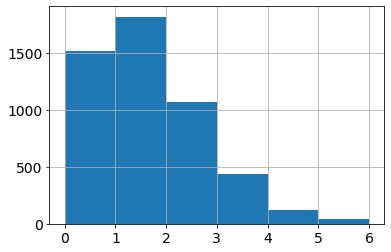

In [9]:
_ = df['Члены семьи'].hist(bins=6)

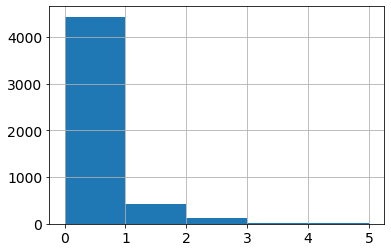

In [10]:
_ = df['Страховые выплаты'].hist(bins=5)

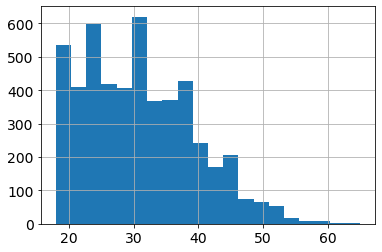

In [11]:
_ = df['Возраст'].hist(bins=20)

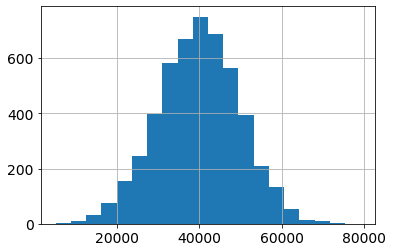

In [12]:
_ = df['Зарплата'].hist(bins=20)

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:**

Если в предсказаниях $a = Xw$, $X$ умножить на обратимую матрицу $Z$, то при вычислении $w = (X^T X)^{-1} X^T y$ предсказания $a$  не дожны изменится.

**Обоснование:**


Для доказательства вместо $X$ подставим в расчеты $XZ$, где $Z$ - обратимая матрица, на которую может быть умножена матрица $X$.

Получим:
$$a_2 = XZw_2$$
$$w_2 = ((XZ)^T XZ)^{-1}(XZ)^T y$$

Подставим $a_2$ и $w_2$ в формулу и сделаем преобразования:

Раскрываем транспонирования по свойству: $(AB)^T = B^T A^T$


$a_2 = X Z ((XZ)^T XZ)^{-1}(XZ)^T y = \\X Z (Z^TX^T XZ)^{-1}Z^T X^T y = \\X Z (X^TXZ)^{-1} (Z^T)^{-1} Z^T X^T y = \\X Z Z^{-1}(X^TX)^{-1} (Z^T)^{-1} Z^T X^T y = \\X E (X^TX)^{-1} E  X^T y = \\X (X^TX)^{-1} X^T y =  X w = a$

Как можно заметить, значение предсказания $a_2$ не меняется и равно $a$, если умножать матрицу признаков на обратимую матрицу.

## Алгоритм преобразования

Для защиты данных клиентов страховой компании умножим матрицу признаков на случайную обратимую матрицу.

Напишем функцию преобразования данных. Для получения обратной матрицы будем использовать функцию numpy.random.normal(), вероятность получить необратимую матрицу близка к нулю.

In [13]:
def crypt_features(features):
    n = features.shape[1]
    Z = np.random.normal(1, 1, (n, n))
    Z_inv = np.linalg.inv(Z)
    if np.allclose(np.dot(Z, Z_inv), np.eye(Z.shape[0])):
        print('Matrix Correct')
        return features @ Z, Z
    else:
        print('Matrix Incorrect')

Матрица Z должна иметь необходимую размерность (n * n), где n - количество признаков для регрессии. Таким образом матрица  будет иметь туже размерность, что и матрица X. 

## Проверка алгоритма

Преобразуем данные.

In [14]:
X_crypt, Z = crypt_features(X)

Matrix Correct


In [15]:
print('Matrix:\n', Z)

Matrix:
 [[-0.08765544  1.011729   -1.38775573 -0.21465258]
 [ 1.66015578 -0.72258178 -0.56101133  2.15556408]
 [ 1.7598988   1.00629852  3.30699974  2.09666067]
 [ 0.48461117  0.20751647  2.06884586  1.88737927]]


In [ ]:
def generate_invertible_matrix(size):
    try: 
        matrix = np.random.normal(size=(size, size))
        # проверим матрицу на обратимость, если нет, пробуем сгенерировать еще раз 
        # таким образом гарантируем, что матрица стопроцентно будет обратимой 
        np.linalg.inv(matrix) 
    except 
        np.linalg.LinAlgError: matrix = generate_invertible_matrix()

return matrix

In [16]:
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [17]:
X_crypt.head()

,0,1,2,3
0,87359.444009,49884.000080,164004.866792,104084.420047
1,66953.006320,38206.312588,125642.252492,79774.148757
2,37006.019397,21111.314089,69430.725238,44092.385412
3,73423.612611,41947.889180,137894.245664,87479.791511
4,45979.755485,26245.170862,86295.597174,54782.984608


Данные преобразовались и теперь имеют "зашифрованный" вид.

Проверим алгоритм на исходных и преобразованных данных по метрике r2 score.

In [18]:
model = LinearRegression()

model.fit(X, y)
predict = model.predict(X)

model.fit(X_crypt, y)
predict_crypt = model.predict(X_crypt)

Сравним показания:

In [19]:
print('Стандартные данные:', r2_score(y, predict))
print('Преобразованные данные:', r2_score(y, predict_crypt))

Стандартные данные: 0.4249455028666801
Преобразованные данные: 0.42494550286667043


Получили одинаковые метрики, что подтверждает теорию.

## Итоговый вывод

Загрузили и изучили данные.

Сделали теоретическое умножение матриц. Значение предсказания $a_2$ не меняется и равно $a$, если умножать матрицу признаков на обратимую матрицу.

Написали функцию преобразования данных в "зашифрованный вид".

Проверили алгоритм LinearRegression на исходных и преобразованных данных по метрике r2 score. Получили одинаковые метрики, что подтвердило теорию.